# 第五章 剔除无用的数值
## 5.1 下载一个月的天气数据
在处理自行车数据时，我需要温度和降水数据，来弄清楚人们下雨时是否喜欢骑自行车。 所以我访问了加拿大历史天气数据的网站，并想出如何自动获得它们。

这里我们将获取 201 年 3 月的数据，并清理它们。

以下是可用于在蒙特利尔获取数据的网址模板。

In [39]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

In [33]:
url_template = "http://climate.weather.gc.ca/climateData/bulkdata_e.html?format=csv&stationID=5415&Year={year}&Month={month}&timeframe=1&submit=Download+Data"

我们获取 2013 年三月的数据，我们需要以month=3, year=2012对它格式化：

In [34]:
#url = url_template.format(month=3, year=2012)
#weather_mar2012 = pd.read_csv(url, skiprows=15, index_col='Date/Time', parse_dates=True, encoding='latin1', header=True)

# because the url is broken, we use our saved dataframe for now
weather_mar2012 = pd.read_csv('../data/weather_2012.csv')

这非常不错！ 我们可以使用和以前一样的read_csv函数，并且只是给它一个 URL 作为文件名。 真棒。

在这个 CSV 的顶部有 16 行元数据，但是 Pandas 知道 CSV 很奇怪，所以有一个skiprows选项。 我们再次解析日期，并将Date/Time设置为索引列。 这是产生的DataFrame。

In [35]:
weather_mar2012

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow


<AxesSubplot:>

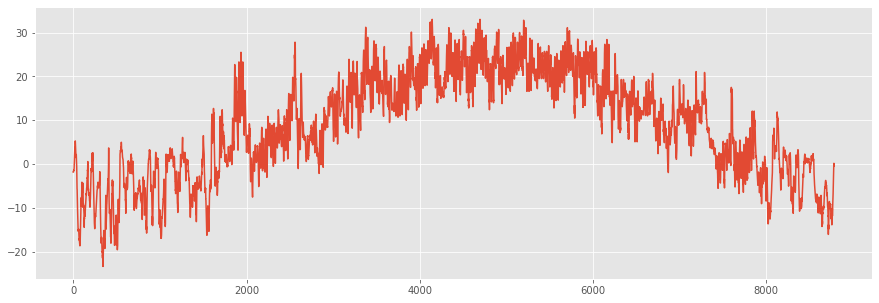

In [36]:
weather_mar2012[u"Temp (C)"].plot(figsize=(15, 5))

注意它在中间升高到25°C。这是一个大问题。 这是三月，人们在外面穿着短裤。

我出城了，而且错过了。真是伤心啊。

我需要将度数字符°写为'\xb0'。 让我们去掉它，让它更容易键入。

In [37]:
weather_mar2012.columns

Index(['Date/Time', 'Temp (C)', 'Dew Point Temp (C)', 'Rel Hum (%)',
       'Wind Spd (km/h)', 'Visibility (km)', 'Stn Press (kPa)', 'Weather'],
      dtype='object')

In [38]:
weather_mar2012.columns = [
    u'Year', u'Month', u'Day', u'Time', u'Data Quality', u'Temp (C)', 
    u'Temp Flag', u'Dew Point Temp (C)', u'Dew Point Temp Flag', 
    u'Rel Hum (%)', u'Rel Hum Flag', u'Wind Dir (10s deg)', u'Wind Dir Flag', 
    u'Wind Spd (km/h)', u'Wind Spd Flag', u'Visibility (km)', u'Visibility Flag',
    u'Stn Press (kPa)', u'Stn Press Flag', u'Hmdx', u'Hmdx Flag', u'Wind Chill', 
    u'Wind Chill Flag', u'Weather']

ValueError: Length mismatch: Expected axis has 8 elements, new values have 24 elements

你会注意到在上面的摘要中，有几个列完全是空的，或其中只有几个值。 让我们使用`dropna`去掉它们。

`dropna`中的`axis=1`意味着“删除列，而不是行”，以及`how ='any'`意味着“如果任何值为空，则删除列”。

现在更好了 - 我们只有带有真实数据的列。

In [ ]:
weather_mar2012 = weather_mar2012.dropna(axis=1, how='any')
weather_mar2012[:5]

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


Year/Month/Day/Time列是冗余的，但Data Quality列看起来不太有用。 让我们去掉他们。

axis = 1参数意味着“删除列”，像以前一样。 dropna和drop等操作的默认值总是对行进行操作。

In [ ]:
weather_mar2012 = weather_mar2012.drop(['Year', 'Month', 'Day', 'Time', 'Data Quality'], axis=1)
weather_mar2012[:5]

KeyError: "['Year', 'Month', 'Day', 'Time', 'Data Quality'] not found in axis"

## 5.2 按一天中的小时绘制温度
这只是为了好玩 - 我们以前已经做过，使用groupby和aggregate！ 我们将了解它是否在夜间变冷。 好吧，这是显然的。 但是让我们这样做。

In [40]:
temperatures = weather_mar2012[[u'Temp (C)']].copy()
print(temperatures.head)
temperatures.loc[:,'Hour'] = weather_mar2012.index.hour
temperatures.groupby('Hour').aggregate(np.median).plot()

<bound method NDFrame.head of       Temp (C)
0         -1.8
1         -1.8
2         -1.8
3         -1.5
4         -1.5
...        ...
8779       0.1
8780       0.2
8781      -0.5
8782      -0.2
8783       0.0

[8784 rows x 1 columns]>


AttributeError: 'RangeIndex' object has no attribute 'hour'

所以温度中位数在 2pm 时达到峰值。

## 5.3 获取整年的数据
好吧，那么如果我们想要全年的数据呢？ 理想情况下 API 会让我们下载，但我不能找出一种方法来实现它。

首先，让我们将上面的成果放到一个函数中，函数按照给定月份获取天气。

我注意到有一个烦人的 bug，当我请求一月时，它给我上一年的数据，所以我们要解决这个问题。 【真的是这样。你可以检查一下 =）】

In [41]:
def download_weather_month(year, month):
    if month == 1:
        year += 1
    url = url_template.format(year=year, month=month)
    weather_data = pd.read_csv(url, skiprows=16, index_col='Date/Time', parse_dates=True)
    weather_data = weather_data.dropna(axis=1)
    weather_data.columns = [col.replace('\xb0', '') for col in weather_data.columns]
    weather_data = weather_data.drop(['Year', 'Day', 'Month', 'Time', 'Data Quality'], axis=1)
    return weather_data

我们可以测试这个函数是否行为正确：

In [42]:
download_weather_month(2012, 1)[:5]

HTTPError: HTTP Error 404: Not Found

现在我们一次性获取了所有月份，需要一些时间来运行。

In [43]:
data_by_month = [download_weather_month(2012, i) for i in range(1, 13)]

HTTPError: HTTP Error 404: Not Found

一旦我们完成之后，可以轻易使用pd.concat将所有DataFrame连接成一个大DataFrame。 现在我们有整年的数据了！

In [44]:
weather_2012 = pd.concat(data_by_month)
weather_2012

NameError: name 'data_by_month' is not defined

## 5.4 保存到 CSV
每次下载数据会非常慢，所以让我们保存DataFrame：

In [ ]:
weather_2012.to_csv('../data/weather_2012.csv')